<a href="https://colab.research.google.com/github/MohammedYassineBen/TP1_ACP/blob/main/TP1_ACP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L'importation des bibliothèques:**

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# **L'importation des données:**

In [4]:
data = pd.read_csv("sample_data/Automobile_data.csv",na_values="?").dropna()
data=data[["highway-mpg","engine-size","horsepower","curb-weight","price"]]


In [5]:
data.head()

,highway-mpg,engine-size,horsepower,curb-weight,price
3,30,109,102.0,2337,13950.0
4,22,136,115.0,2824,17450.0
6,25,136,110.0,2844,17710.0
8,20,131,140.0,3086,23875.0
10,29,108,101.0,2395,16430.0


In [ ]:
for col in data.columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')  # Vérifier que la colonne contient des nombres
  moyenne = data[col].mean()
  data[col].fillna(moyenne, inplace=True)


In [ ]:
(data.isnull().values.any())

False

# **Centrage et réduction des données :**

In [ ]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:

scaler = StandardScaler()

In [ ]:
# Afficher le DataFrame centré et réduit
print(data_scaled)

[[-0.3233128  -0.33678462  0.20127869 -0.25839367  0.42739781]
 [-1.56577168  0.55240135  0.62581242  0.75529552  1.02473438]
 [-1.0998496   0.55240135  0.46253021  0.79692547  1.06910795]
 [-1.87638639  0.38773728  1.44222343  1.30064782  2.12127366]
 [-0.47862016 -0.36971744  0.16862225 -0.13766683  0.85065344]
 [-0.47862016 -0.36971744  0.16862225 -0.13766683  0.93513389]
 [-0.63392752  1.47452013  0.82175106  0.51800483  1.62548431]
 [-0.63392752  1.47452013  0.82175106  0.63248718  1.64852443]
 [ 3.24875645 -1.91755968 -1.5621691  -2.0255849  -1.07430634]
 [ 1.69568286 -0.96250809 -0.84372741 -1.22212693 -0.87906261]
 [ 1.69568286 -0.96250809 -0.84372741 -1.14927452 -0.83127569]
 [ 1.38506815 -0.96250809 -0.90904029 -1.21796394 -1.00245528]
 [ 0.91914607 -0.96250809 -0.90904029 -1.21796394 -0.86506787]
 [-0.3233128  -0.69904558  0.20127869 -0.69342661 -0.59541307]
 [ 0.91914607 -0.96250809 -0.90904029 -1.02854768 -0.89032667]
 [ 0.91914607 -0.96250809 -0.90904029 -0.98275474 -0.81

# **La matrice de scatter plots :**

array([[<Axes: xlabel='highway-mpg', ylabel='highway-mpg'>,
        <Axes: xlabel='engine-size', ylabel='highway-mpg'>,
        <Axes: xlabel='horsepower', ylabel='highway-mpg'>,
        <Axes: xlabel='curb-weight', ylabel='highway-mpg'>,
        <Axes: xlabel='price', ylabel='highway-mpg'>],
       [<Axes: xlabel='highway-mpg', ylabel='engine-size'>,
        <Axes: xlabel='engine-size', ylabel='engine-size'>,
        <Axes: xlabel='horsepower', ylabel='engine-size'>,
        <Axes: xlabel='curb-weight', ylabel='engine-size'>,
        <Axes: xlabel='price', ylabel='engine-size'>],
       [<Axes: xlabel='highway-mpg', ylabel='horsepower'>,
        <Axes: xlabel='engine-size', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='curb-weight', ylabel='horsepower'>,
        <Axes: xlabel='price', ylabel='horsepower'>],
       [<Axes: xlabel='highway-mpg', ylabel='curb-weight'>,
        <Axes: xlabel='engine-size', ylabel='curb-weight'>,
   

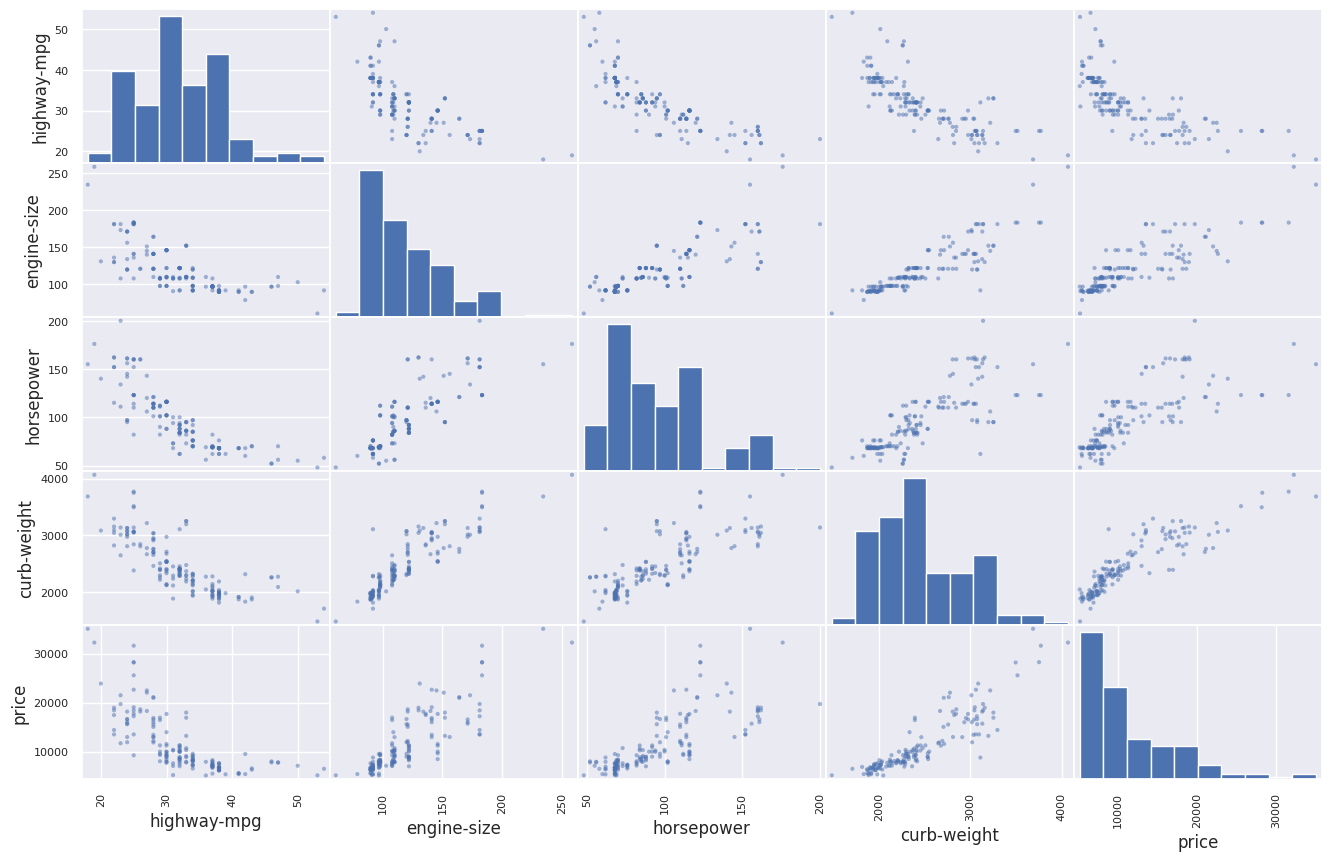

In [ ]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(data)

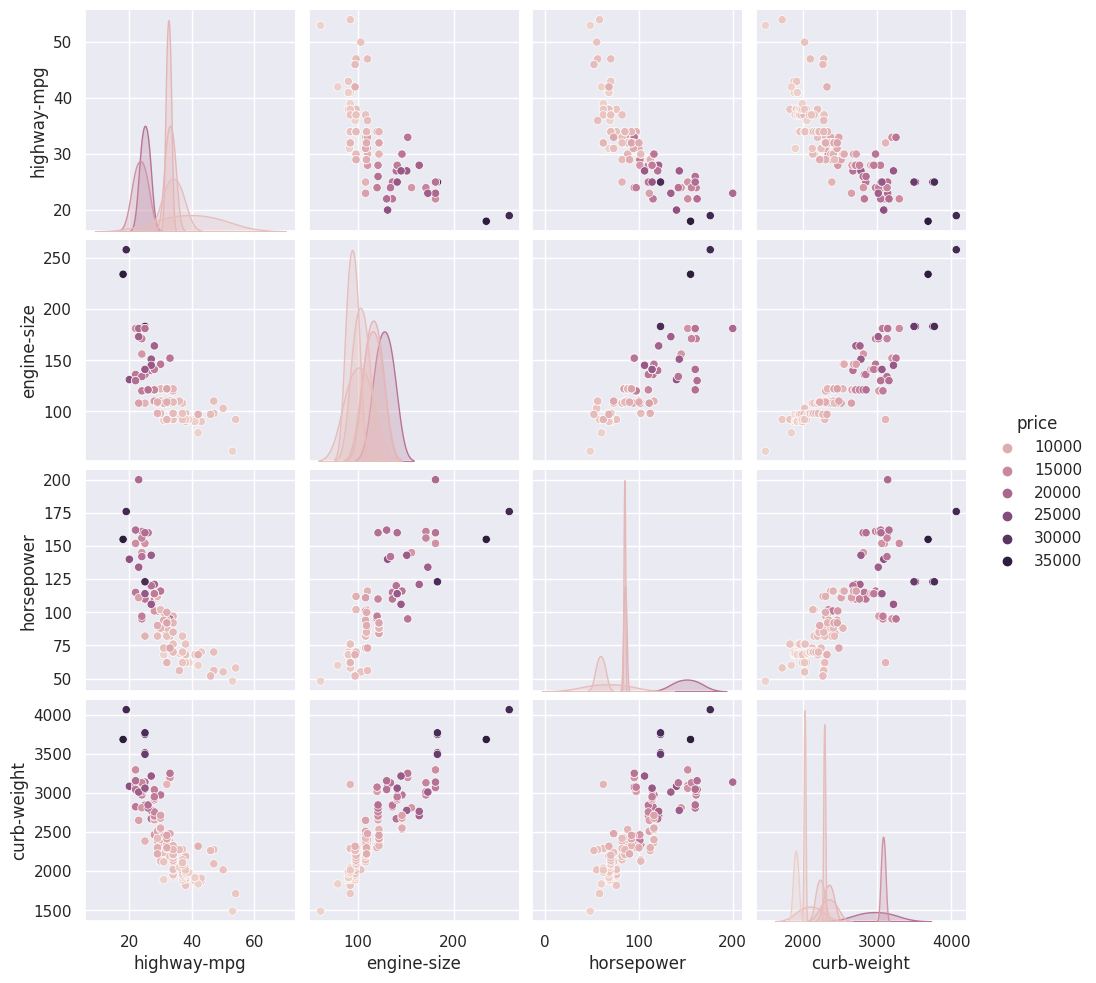

In [ ]:
import seaborn as sns
sns.pairplot(data, hue ='price')

# **Les boites a moustaches :**

<Axes: xlabel='engine-size', ylabel='price'>

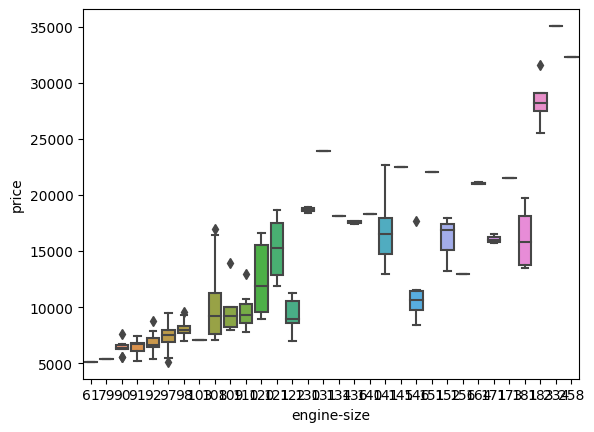

In [ ]:
import seaborn as sns
sns.boxplot(y = 'price', x = 'engine-size', data=data)

# **La matrice de corrélation:**

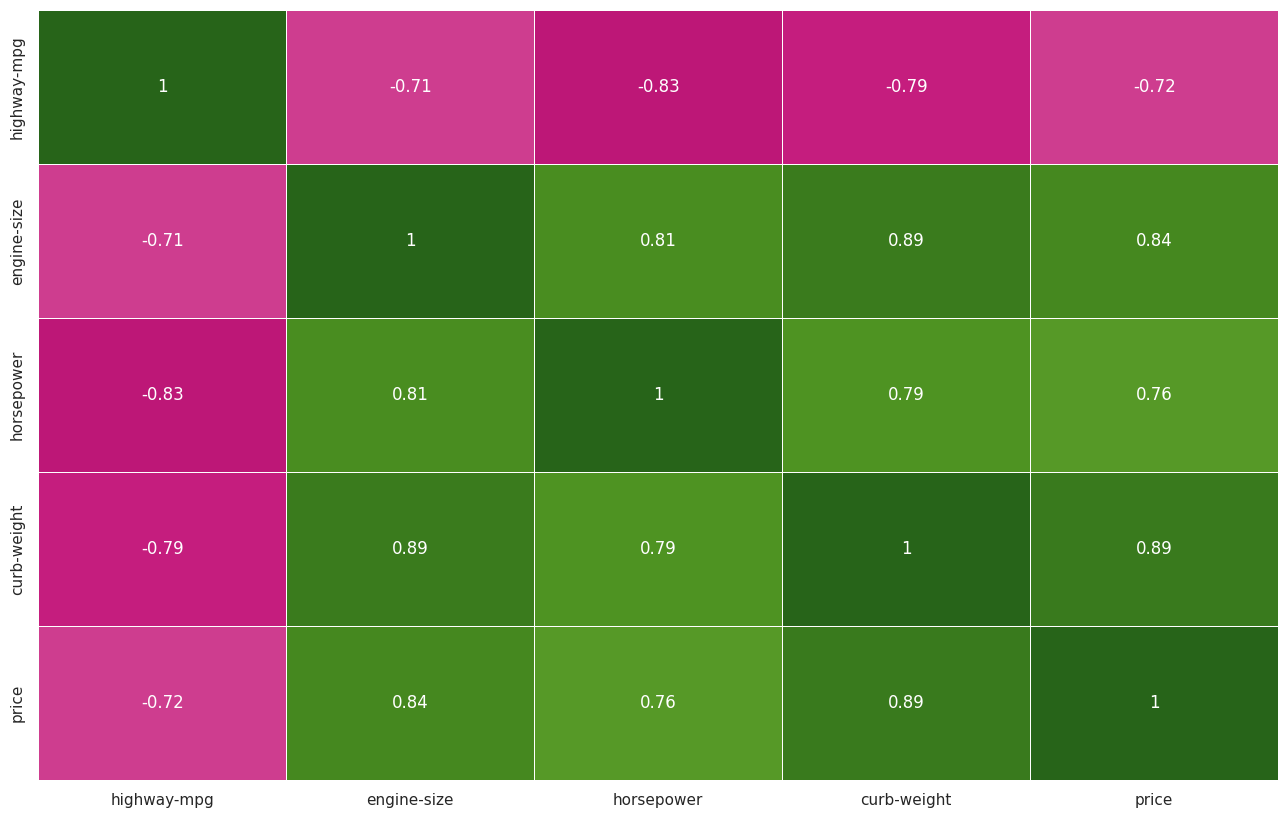

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

# **Les composantes principales:**

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
n_components = 2  # Nombre de composantes principales 
pca = PCA(n_components=n_components)

In [ ]:
data_pca = pd.DataFrame(data=composantes_principales, columns=['PC1', 'PC2'])

In [ ]:
composantes_principales = pca.fit_transform(data_scaled)

In [ ]:
print(data_pca)

          PC1       PC2
0    0.147179 -0.301096
1    2.006964 -0.478153
2    1.774036 -0.066795
3    3.171464 -0.462564
4    0.429729 -0.188006
..        ...       ...
154  1.744928  0.245089
155  2.872901 -0.476013
156  3.256331  0.187499
157  2.440359  0.857031
158  2.492191  0.419317

[159 rows x 2 columns]


# **Nuage de points des composantes principales :**


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Nuage de points des composantes principales')

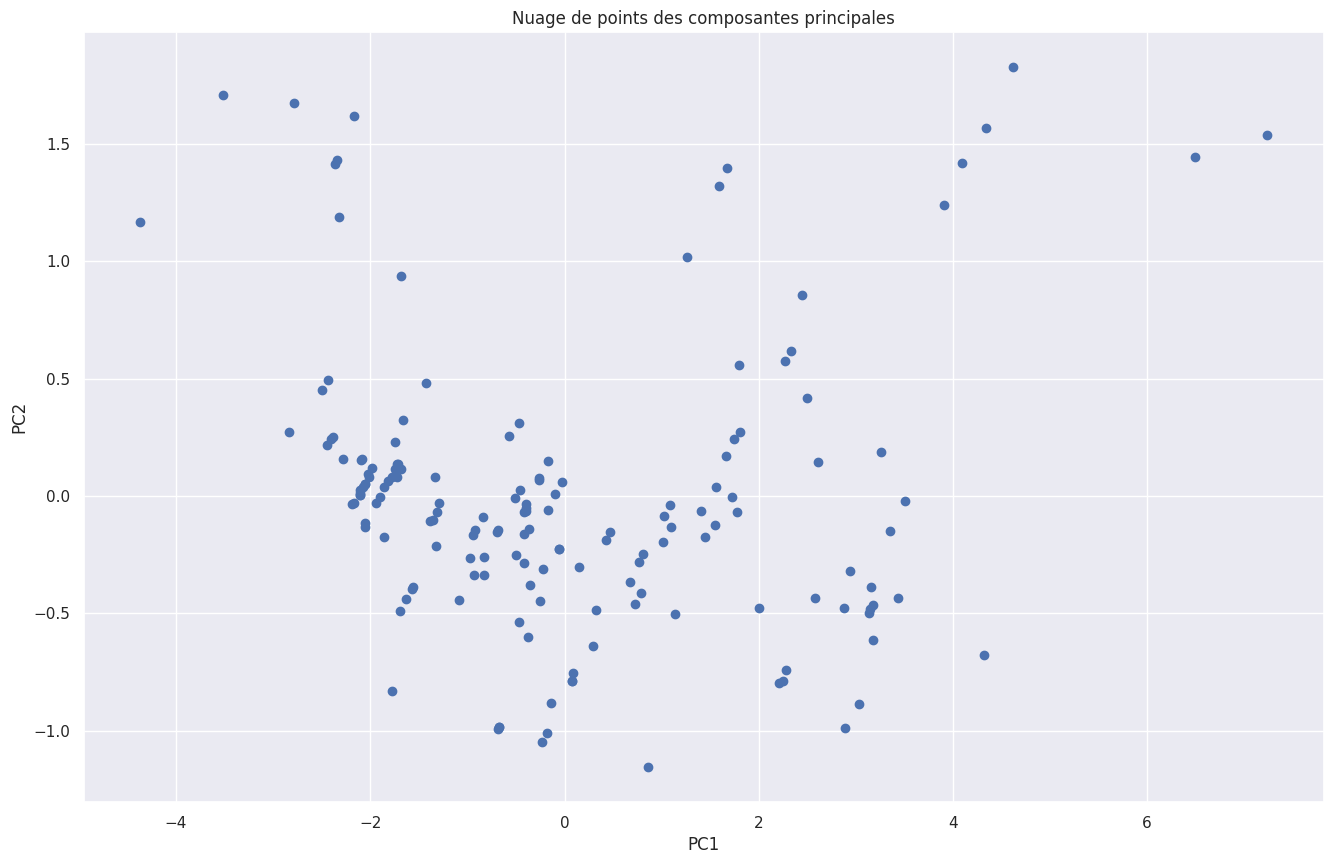

In [ ]:
plt.scatter(data_pca['PC1'], data_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Nuage de points des composantes principales')


In [ ]:
plt.show()

# **Les vecteurs propres et les valeurs propres:**

In [ ]:
import numpy as np

In [ ]:
# Calculons les vecteurs propres et les valeurs propres de la matrice de covariance
vecteurs_propres = pca.components_
valeurs_propres = pca.explained_variance_


# **Le cercle de corrélation:**

In [ ]:
# la liste de noms de colonnes pour l'affichage des étiquettes
noms_colonnes = list(data.columns)

In [ ]:
# on définit les limites des axes x et y
#limite_axes = max(np.abs(composantes_principales.min()), np.abs(composantes_principales.max())) * 1.1
limite_axes=1

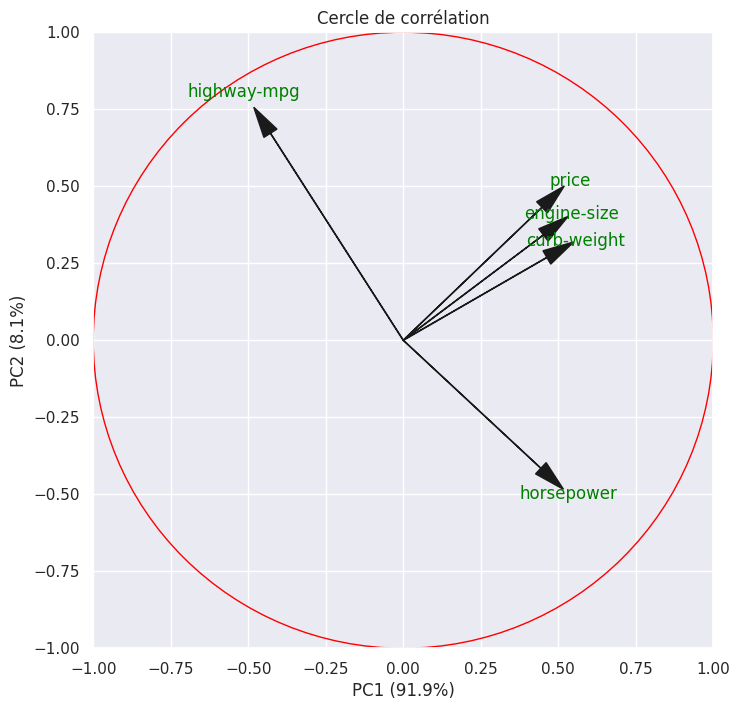

In [ ]:
# Dessiner le cercle de corrélation
fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(noms_colonnes)):
    ax.arrow(0, 0, vecteurs_propres[0, i]*limite_axes, vecteurs_propres[1, i]*limite_axes, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(vecteurs_propres[0, i]*limite_axes*1.2, vecteurs_propres[1, i]*limite_axes*1.2, noms_colonnes[i], color='green', ha='center', va='center')
ax.set_xlim(-limite_axes, limite_axes)
ax.set_ylim(-limite_axes, limite_axes)
ax.set_xlabel("PC1 ({}%)".format(round(100*valeurs_propres[0]/sum(valeurs_propres), 1)))
ax.set_ylabel("PC2 ({}%)".format(round(100*valeurs_propres[1]/sum(valeurs_propres), 1)))
ax.set_title("Cercle de corrélation")
circle = plt.Circle((0,0), 1, color='red', fill=False)
ax.add_artist(circle)

In [ ]:
plt.show()

# **La génération de 10 points aléatoires :**

In [ ]:
points_aleatoires = np.random.rand(10, len(data.columns))

In [ ]:
# Calculons les projections sur les composantes principales
proj = pca.transform(points_aleatoires)
# Calculons les distances entre les points originaux et les points projetés
distances = np.sqrt(np.sum((points_aleatoires - pca.inverse_transform(proj))**2, axis=1))
# Pour afficher les distances
print(distances)



[0.40885947 0.7982028  0.96771899 0.95469344 0.81960733 0.68157337
 0.79809104 0.58063719 0.63350291 1.09530601]


# **Interpretation:**
 les distances entre les points originaux et les points projetés sur les composantes principales sont toutes inférieures à 1, ce qui indique que la projection est de bonne qualité. 

In [ ]:
#print(data_scaled)

# **La régression linéaire:**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# effectuer une PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(data_pca, data['Y'], test_size=0.2)
# Créer un objet de modèle de régression linéaire et ajuster les données d'entraînement
reg = LinearRegression().fit(X_train, y_train)

# Prédire les valeurs cibles pour les données de test
y_pred = reg.predict(X_test)

# Calculer le coefficient de détermination (R2) pour évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) : {:.2f}".format(r2))

NameError: ignored

Text(0, 0.5, 'Cumulative explained variance')

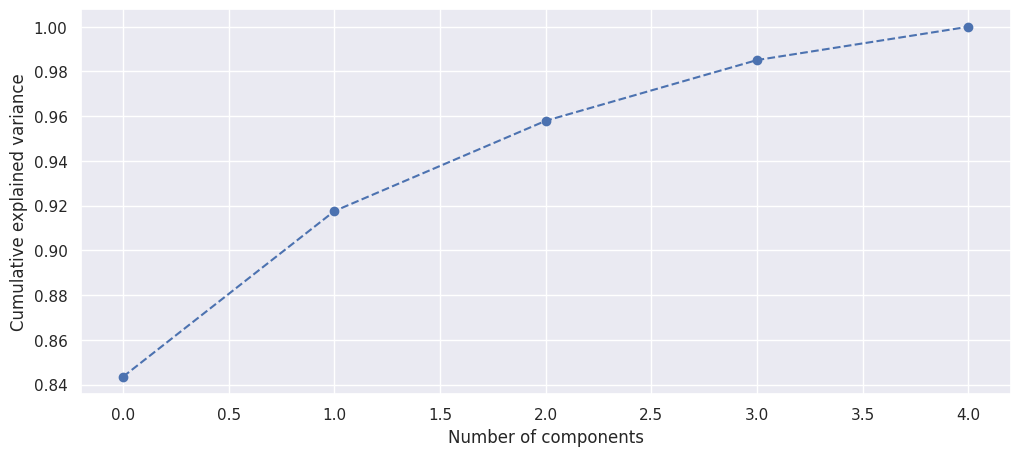

In [ ]:
# import PCA module
from sklearn.decomposition import PCA
# scaling data
data = scaler.fit_transform(data)
# fit PCA to data
pca = PCA()
pca.fit(data)
evr = pca.explained_variance_ratio_
# visualizing the variance explained by each principal components
plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="o", linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")